In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_2.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
DS={}
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])



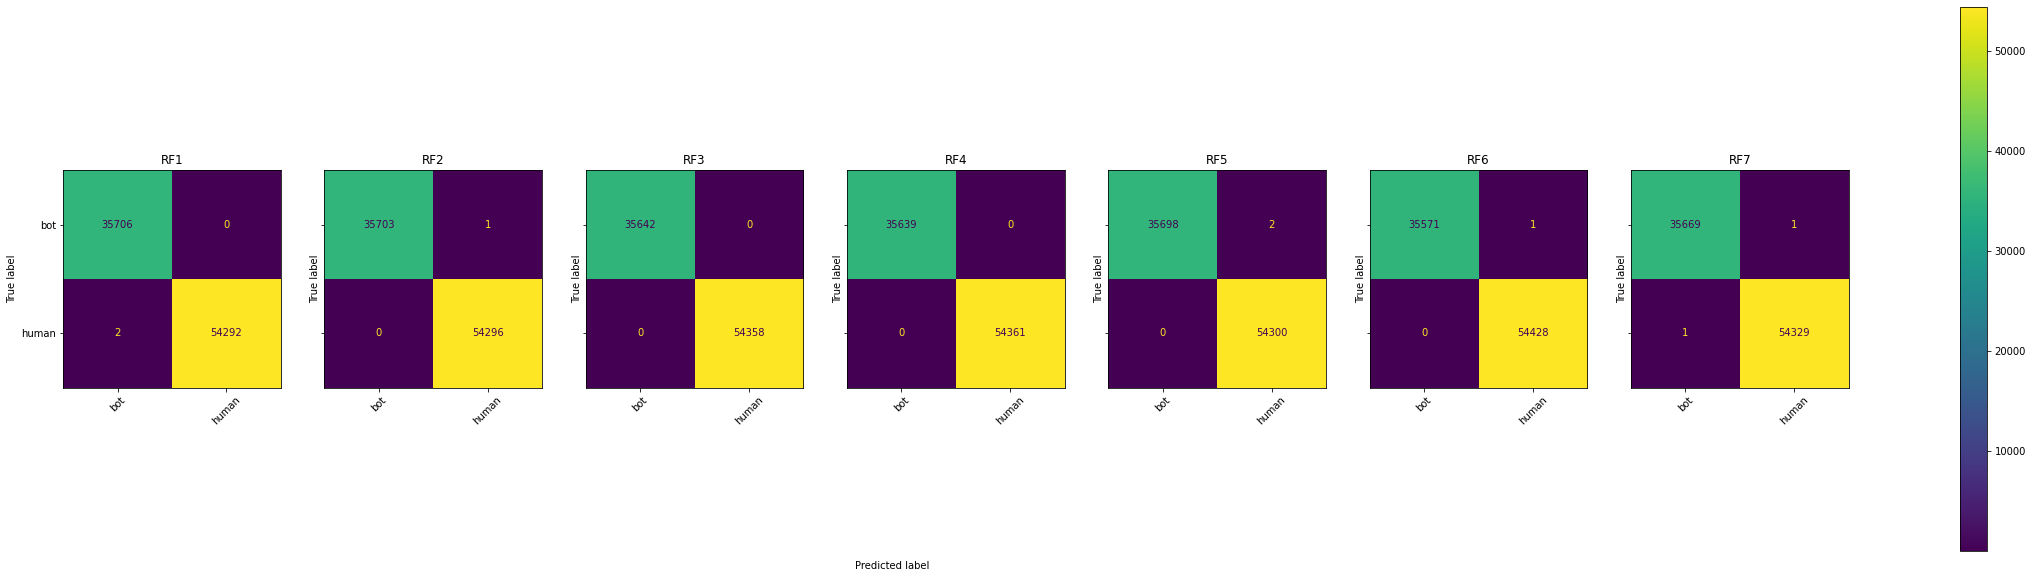

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.999944,1.000000,0.999972,35706,1.000000,0.999963,0.999982,54294,0.999978
1,RF2,1.000000,0.999972,0.999986,35704,0.999982,1.000000,0.999991,54296,0.999989
2,RF3,1.000000,1.000000,1.000000,35642,1.000000,1.000000,1.000000,54358,1.000000
3,RF4,1.000000,1.000000,1.000000,35639,1.000000,1.000000,1.000000,54361,1.000000
4,RF5,1.000000,0.999944,0.999972,35700,0.999963,1.000000,0.999982,54300,0.999978
5,RF6,1.000000,0.999972,0.999986,35572,0.999982,1.000000,0.999991,54428,0.999989
6,RF7,0.999972,0.999972,0.999972,35670,0.999982,0.999982,0.999982,54330,0.999978


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

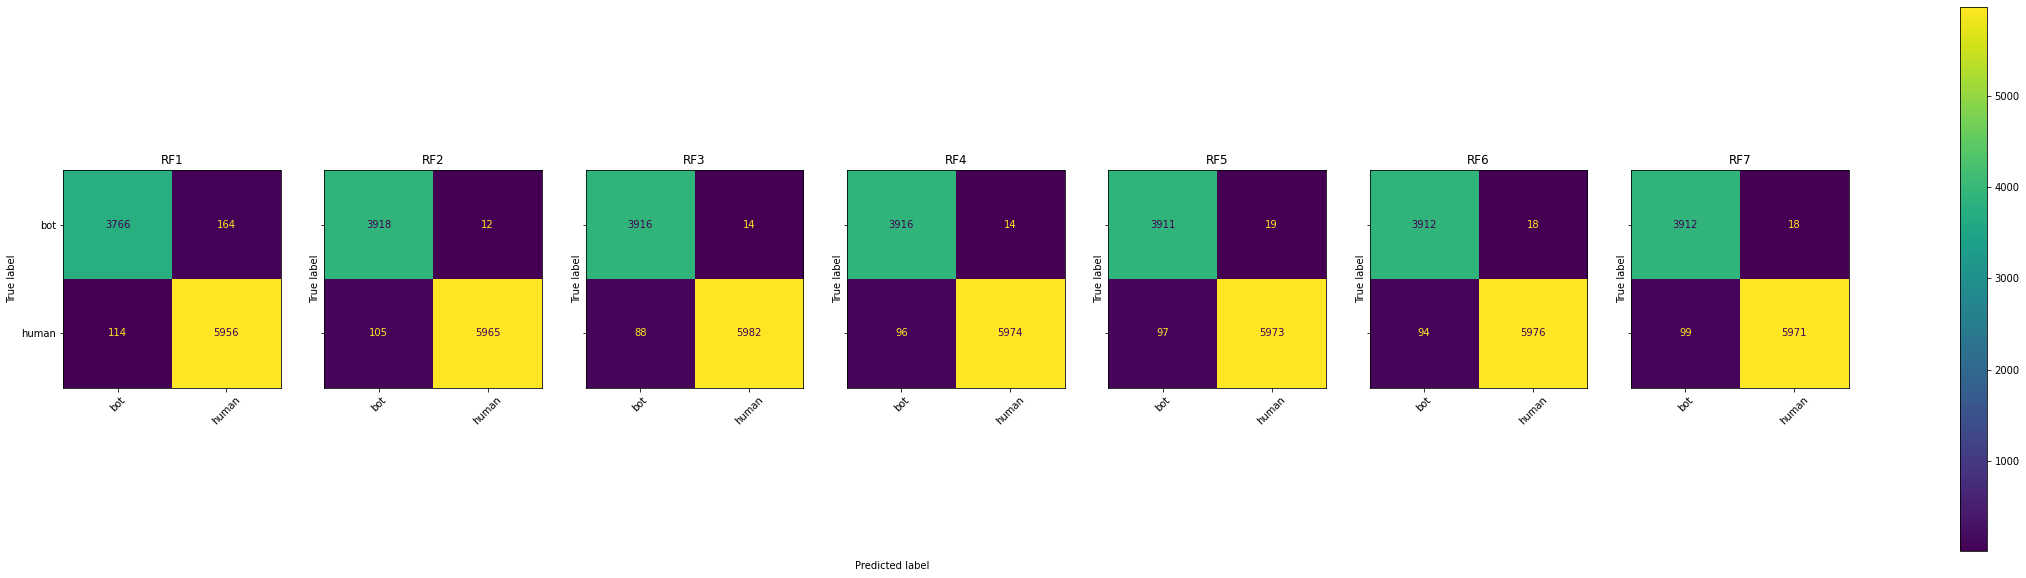

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.970619,0.958270,0.964405,3930,0.973203,0.981219,0.977194,6070,0.9722
1,RF2,0.973900,0.996947,0.985289,3930,0.997992,0.982702,0.990288,6070,0.9883
2,RF3,0.978022,0.996438,0.987144,3930,0.997665,0.985502,0.991546,6070,0.9898
3,RF4,0.976072,0.996438,0.986150,3930,0.997662,0.984185,0.990877,6070,0.9890
4,RF5,0.975798,0.995165,0.985387,3930,0.996829,0.984020,0.990383,6070,0.9884
5,RF6,0.976535,0.995420,0.985887,3930,0.996997,0.984514,0.990716,6070,0.9888
6,RF7,0.975318,0.995420,0.985266,3930,0.996994,0.983690,0.990298,6070,0.9883


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test1"])
    cf_matrix = confusion_matrix(y["test1"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test1"], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
print(len(y_predict["test1"]))

10000


In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)

              precision    recall  f1-score   support

         bot       0.98      1.00      0.99      3930
       human       1.00      0.98      0.99      6070

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



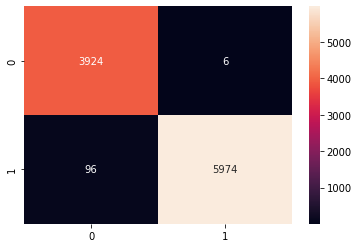

In [ ]:
print(classification_report(y["test1"], output_prediction))
cm = confusion_matrix(y["test1"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")

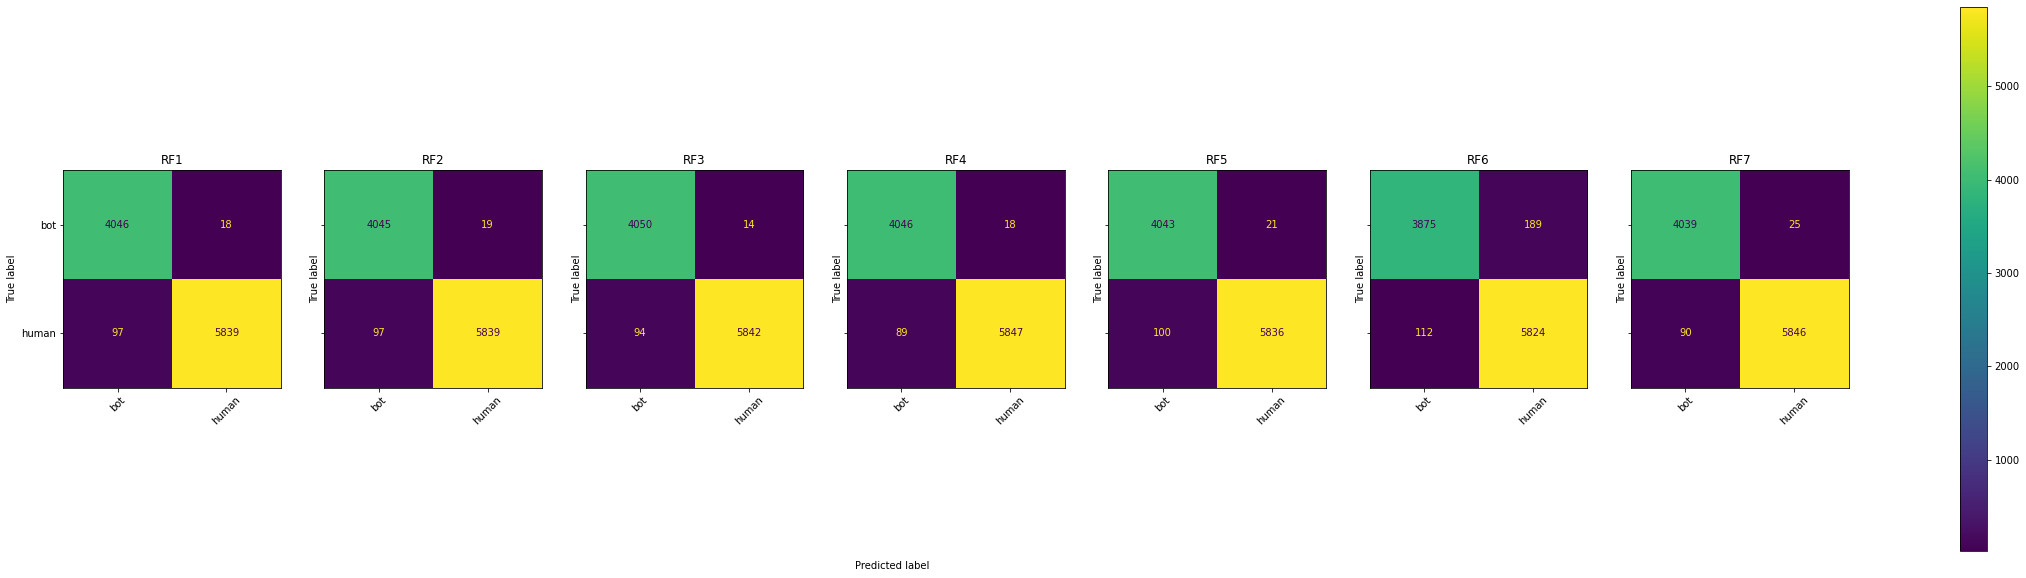

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test6"])
    cf_matrix = confusion_matrix(y["test6"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
X["test1"].head()

,favourites_count,followers_count,favourites_growth_rate,followers_friends_ratio,friends_growth_rate,statuses_count,listed_count,friends_count,followers_growth_rate,verified,tweet_freq,listed_growth_rate,name_length,description_length,screen_name_length,default_profile,profile_use_background_image,num_digits_in_screen_name,num_digits_in_name
59628,-0.514958,-0.027067,-0.135715,0.642802,1.627528,-0.425596,-0.054053,-0.120023,0.642802,-0.087248,-0.058490,-0.053381,0.226893,-0.371522,-1.289914,0.508340,0.365248,-0.513856,-0.198087
50459,0.068371,-0.024805,-0.060003,-0.047549,-0.080411,-0.033517,-0.054053,-0.101471,-0.047549,-0.087248,-0.062621,-0.053381,-0.906959,-0.892533,-0.490384,0.508340,0.365248,-0.513856,-0.198087
5602,-0.514766,-0.027534,-0.139701,-0.051281,-0.081418,-0.425466,-0.054053,-0.131393,-0.051281,-0.087248,-0.111666,-0.053381,0.085162,-1.283290,0.309146,0.508340,0.365248,-0.022308,-0.198087
83660,-0.514996,-0.027483,-0.141541,-0.046867,-0.084472,-0.425596,-0.054053,-0.131792,-0.046867,-0.087248,-0.112315,-0.053381,0.226893,-1.283290,-0.890149,0.508340,0.365248,-0.513856,-0.198087
73846,-0.040512,-0.025664,-0.061158,-0.048182,-0.077801,-0.326137,-0.054053,-0.090700,-0.048182,-0.087248,-0.099319,-0.053381,-0.906959,-0.483167,-0.090619,-1.967188,-2.737866,-0.513856,-0.198087
